# Diversity Initiatives amongst Four-Year Colleges in the US

Rohit Gupta   
DATA 512 Final Project   
University of Washington, Fall 2018   

## Introduction
College Scorecard Data is a rich dataset that enables effective decision-making by students interested in pursuing college in the US. It has a range of important information such as the costs, scores, socio-economic breakdowns, graduation percentages, future earnings, debt measures etc. It was announced as a policy initiative by President Obama in 2013 during a State of the Union Address.[1] The release of the dataset was an important milestone in ensuring transparency and enabling smarter decision-making on the part of students and their parents/guardians. It can also potentially inform policy decisions as value-addition at the college level is a strong component of social mobility.[2]

## Background
While for-profit organizations such as the U.S. News & World Report and Forbes have been serving the needs of the intended audience of this dataset, the unbiased nature of the College Scorecard dataset makes it distinguished from the above. For-profit institutions usually have no obligation to full transparency, and the intelligence layer on top of the raw data can be used to push an agenda that might not be in line with the interests of the end consumers (i.e. students in this case). Having a one-size-fits-all approach like these also have a tendency to be easily gamed: colleges artificially inflate their rankings by engaging in a downward spiral of doom.[3]
For instance, assuming that graduation rate is one of the most important criteria for a particular ranking system, inclusion/diversity efforts by an institution can be met with a decrease in the ranking as students coming from a lower socio-economic background have a higher chance of dropping out. The dataset also stretches out far into the future (earnings after ~10 years), and the sample size is respectable enough to draw meaningful conclusions (compared to for-profit services such as Payscale, which includes a lesser number of institutions with not enough information about included sample sizes, which limits the reliability of most types of analysis).

## Research Questions
How to identify the colleges that focus on the diversity of incoming students, measured along:
* Family Income
* Deviation in Test Scores
* Cost of Attending the School
* Racial Diversity

For the colleges that do focus on diversity, how do they stand apart on measures such as:
* Admission Rate
* Completion Rate
* Loan Repayment Rate
* Return on Investment

## Human Centered Design Considerations
Human-centered design considerations have informed my understanding of the project from the scope to execution. While a generic ranking of the colleges might be a good starting point, it usually lacks a lot of important details. This study aims to account for different starting points in terms of student opportunities/abilities and identify institutions that are ideal for serving a very specific subset of the student population. The aim is to uncover institutions that add a lot of value by ensuring higher-than-expected earnings and/or graduation rates. It can be observed that some institutions admit students who were already "destined" for success, and the schools ranked high in traditional ranking paradigms usually provide a badge of exclusivity, reinforcing the cycle across time. Patterns emerging out of these clusters might help the less-advantaged students in identifying institutions that help them meet their goals.

## Reproducibility
The entire analysis in the notebook is done keeping in mind the reproducibility aspect. The raw dataset can be downloaded from the [source](https://ed-public-download.app.cloud.gov/downloads/Most-Recent-Cohorts-All-Data-Elements.csv) or can be downloaded from the GitHub repository, under the data directory. Cloning the repository is the most straight-forward way to reproduce the analysis.

The software involved in the analysis:
* Python (3.4.5) [Documentation](https://www.python.org/doc/)
* Anaconda (4.5.11) [Documentation](https://docs.anaconda.com/)
* Pandas (0.19.2) [Documentation](https://pandas.pydata.org/pandas-docs/stable/)
* ScikitLearn (0.18.1) [Documentation](https://scikit-learn.org/stable/documentation.html)
* Numpy (1.11.3) [Documentation](https://docs.scipy.org/doc/)
* Scipy (0.18.1) [Documentation](https://docs.scipy.org/doc/)
* MatplotLib (2.0.0) [Documentation](https://matplotlib.org/contents.html)
* Basemap (1.0.8) [Documentation](https://matplotlib.org/basemap/)

## Initial Setup
Installing all the packages necessary for the analysis. 

In [1]:
# importing packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

We read the dataset downloaded from the source. The same dataset can also be found by unzipping raw_data.zip
We also replace the rows with "PrivacySuppressed" to NaN (not a number) so that it is easier to handle.

In [2]:
# reading the most recent scorecard data
raw_df = pd.read_csv('Most-Recent-Cohorts-All-Data-Elements.csv', low_memory=False)

# replacing "privacy suppressed" data points with NaN 
raw_df = raw_df.replace('PrivacySuppressed', np.NaN)

We only select the columns that we deem necessary for answering the research question at hand. The columns selected are as follows:
* UNITID (Unit ID for institution)
* INSTNM (Institution name)
* CITY
* STABBR (State postcode) 
* HIGHDEG (Highest degree awarded)
* ADM_RATE (Admission rate)
* SATVR25 (25th percentile of SAT scores at the institution (critical reading))
* SATVR75 (75th percentile of SAT scores at the institution (critical reading))
* SATMT25 (25th percentile of SAT scores at the institution (math))
* SATMT75 (75th percentile of SAT scores at the institution (math))
* SATWR25 (25th percentile of SAT scores at the institution (writing))
* SATWR75 (75th percentile of SAT scores at the institution (writing))
* PCIP10 (Percentage of degrees awarded in Communications Technologies/Technicians And Support Services)
* PCIP11 (Percentage of degrees awarded in Computer And Information Sciences And Support Services)
* PCIP14 (Percentage of degrees awarded in Engineering)
* PCIP15 (Percentage of degrees awarded in Engineering Technologies And Engineering-Related Fields)
* PCIP26 (Percentage of degrees awarded in Biological And Biomedical Sciences)
* PCIP27 (Percentage of degrees awarded in Mathematics And Statistics)
* COSTT4_A (Average cost of attendance (academic year institutions))
* UGDS (Enrollment of undergraduate certificate/degree-seeking students)
* UGDS_WHITE (Total share of enrollment of undergraduate degree-seeking students who are white)
* AVGFACSAL (Average faculty salary)
* C150_4 (Completion rate for first-time, full-time students at four-year institutions (150% of expected time to completion))
* COMPL_RPY_5YR_RT (Five-year repayment rate for completers)
* NONCOM_RPY_5YR_RT (Five-year repayment rate for non-completers)
* FAMINC (Average family income in real 2015 dollars)
* MN_EARN_WNE_P10 (Mean earnings of students working and not enrolled 10 years after entry)
* SD_EARN_WNE_P10 (Standard deviation of earnings of students working and not enrolled 10 years after entry)

In [3]:
# getting the relevant columns
rel_cols = ['UNITID','INSTNM','CITY','STABBR','HIGHDEG',
           'ADM_RATE','SATVR25','SATVR75','SATMT25','SATMT75','SATWR25','SATWR75',
           'PCIP10','PCIP11','PCIP14','PCIP15','PCIP26','PCIP27', 'COSTT4_A',
           'UGDS','UGDS_WHITE','AVGFACSAL','C150_4','COMPL_RPY_5YR_RT',
           'NONCOM_RPY_5YR_RT','FAMINC','MN_EARN_WNE_P10','SD_EARN_WNE_P10']

We subset the dataset and only retain the columns that are required for performing the analysis. We also subset the dataset to only have colleges that award at least a Bachelor's degree. 3 refers to a Bachelor's degree, and 4 refers to a Master's degree. Hence, we have select all colleges where the highest degree offered is either a Bachelor's or Master's. 

In [4]:
# subsetting the dataset
df = raw_df[rel_cols]

# only seleccting those institutions where the highest degree awarded is atleast bachelor's
df = df.loc[df['HIGHDEG'].isin([3,4])]

In [5]:
# taking a snapshot of the data
df.head(3)

,UNITID,INSTNM,CITY,STABBR,HIGHDEG,ADM_RATE,SATVR25,SATVR75,SATMT25,SATMT75,...,COSTT4_A,UGDS,UGDS_WHITE,AVGFACSAL,C150_4,COMPL_RPY_5YR_RT,NONCOM_RPY_5YR_RT,FAMINC,MN_EARN_WNE_P10,SD_EARN_WNE_P10
0,100654,Alabama A & M University,Normal,AL,4,0.8738,380.0,470.0,370.0,470.0,...,22667.0,4616.0,0.0256,7028.0,0.2749,0.5113182423,0.2623284189,32362.826114,35500,25400
1,100663,University of Alabama at Birmingham,Birmingham,AL,4,0.5814,480.0,640.0,490.0,660.0,...,22684.0,12047.0,0.5786,10517.0,0.5309,0.6733300829,0.4895023328,51306.674306,48400,39200
2,100690,Amridge University,Montgomery,AL,4,NaN,NaN,NaN,NaN,NaN,...,13380.0,293.0,0.1570,3857.0,0.2500,0.5507246377,0.2848101266,21079.472973,47600,38600


We check the sparsity of columns to see if any of the columns is much more empty than the others. We only intend to perform the analysis on the colleges that have no missing data.

In [6]:
# checking which columns are mostly empty
df.isnull().sum()

UNITID                  0
INSTNM                  0
CITY                    0
STABBR                  0
HIGHDEG                 0
ADM_RATE             1084
SATVR25              1621
SATVR75              1621
SATMT25              1619
SATMT75              1619
SATWR25              2109
SATWR75              2109
PCIP10                289
PCIP11                289
PCIP14                289
PCIP15                289
PCIP26                289
PCIP27                289
COSTT4_A              578
UGDS                  287
UGDS_WHITE            287
AVGFACSAL             154
C150_4                504
COMPL_RPY_5YR_RT      637
NONCOM_RPY_5YR_RT     637
FAMINC                280
MN_EARN_WNE_P10       488
SD_EARN_WNE_P10       488
dtype: int64

In [7]:
# taking only the insitutions where the data is complete
df = df.dropna(how = 'any')

After taking only those colleges where we have complete data, let us check the resultant number of colleges.

In [8]:
# checking the dimensions (rows and number of features)
df.shape

(644, 28)

As we can see there is complete data for only 644 colleges, whilst the original dataset had 7175 colleges. Hence, there is a possibility of bias as colleges with incomplete data have been removed. However, most of the colleges with national importance is retained in the data and can be checked with INSTNM variable. 

We prepare the dataset to have features required for answering the research question.   
As the SAT score is given separately for Critical Reading, Math, and Writing, we calculate the difference between the 25th and 75th percentile for all 3 and take their average to arrive at the deviation measure of SAT scores.   
We also sum up the percentages of all Science, Technology, Engineering and Mathematics (STEM) subjects to arrive at a composite score of STEM degrees awarded at an institution.  
We calculate the Return on Investment metric, by the following formula:  
>ROI = (Gain from Investment - Cost of Investment) / Cost of Investment

Here the gain from the investment is the mean earnings after 10 years after entry, and the cost of investment is the average cost of attendance. 

In [9]:
# data preparation
# calculating deviation in scores amongst institutions
df['SAT_CR_DEV'] = df['SATVR75'] - df['SATVR25']
df['SAT_MT_DEV'] = df['SATMT75'] - df['SATMT25']
df['SAT_WR_DEV'] = df['SATWR75'] - df['SATWR25']

# average measure of deviation in SAT Scores
df['SAT_DEV'] = (df['SAT_CR_DEV'] + df['SAT_MT_DEV'] + df['SAT_WR_DEV'])/3

# percentage of STEM degress awarded
df['PERC_STEM'] = df['PCIP10'] + df['PCIP11'] + df['PCIP14'] + df['PCIP15'] + df['PCIP26'] + df['PCIP27']

# return on investment
df['ROI'] = (df['MN_EARN_WNE_P10'].astype(float) - df['COSTT4_A'].astype(float))/df['COSTT4_A'].astype(float)

We use k-means clustering to cluster the colleges based on their diversity efforts.   
For an intuitive explanation of k-means clustering, you can have a look at the following video:  
https://www.youtube.com/watch?v=_aWzGGNrcic

We use the following variables to perform the clustering exercise:
* Family Income
* Average Deviation in SAT scores
* Total share of enrollment of undergraduate degree-seeking students who are white
* Cost of Attendance

Before performing the clustering, we also normalize all the variables by centering it around its mean value and dividing by (max - min) value. 


In [10]:
# clustering the institutions
# parameters: family income, deviation in SAT scores, proportion of white students, cost of attendance
# converting all variables to float
df['FAMINC'] = df['FAMINC'].astype(float)
df['SAT_DEV'] = df['SAT_DEV'].astype(float)
df['UGDS_WHITE'] = df['UGDS_WHITE'].astype(float)
df['COSTT4_A'] = df['COSTT4_A'].astype(float)

# normalizing all the variables
df['FAMINC_N'] = (df['FAMINC'] - df['FAMINC'].mean())/(df['FAMINC'].max() - df['FAMINC'].min())
df['SAT_DEV_N'] = (df['SAT_DEV'] - df['SAT_DEV'].mean())/(df['SAT_DEV'].max() - df['SAT_DEV'].min())
df['UGDS_WHITE_N'] = (df['UGDS_WHITE'] - df['UGDS_WHITE'].mean())/(df['UGDS_WHITE'].max() - df['UGDS_WHITE'].min())
df['COSTT4_A_N'] = (df['COSTT4_A'] - df['COSTT4_A'].mean())/(df['COSTT4_A'].max() - df['COSTT4_A'].min())

We run the clustering algorithm, and print the cost for cluster values [1,10].  
k determines the resulting number of clusters, and we can see that the cost varies a lot till the value of 4, but does not change much after that. Hence, 4 clusters seem to be the right decision for this use-case.

In [11]:
# reference:
#https://learn.scientificprogramming.io/python-k-means-data-clustering-and-finding-of-the-best-k-485f66297c06

# clustering exercise
cluster_par = ['FAMINC_N','SAT_DEV_N','UGDS_WHITE_N','COSTT4_A_N']
cluster_df = df[cluster_par]

# trying different values for k
for k in range (1, 10):
    # create a kmeans model on our data, using k clusters
    kmeans_model = KMeans(n_clusters = k, random_state = 1).fit(cluster_df.iloc[:, :])

    # fitted labels for clusters -- the first cluster has label 0, and the second has label 1
    labels = kmeans_model.labels_
 
    # sum of distances of samples to their closest cluster center
    inertia = kmeans_model.inertia_
    print ("k:",k, " cost:", inertia)

k: 1  cost: 103.785853782
k: 2  cost: 65.8452965994
k: 3  cost: 45.4256028614
k: 4  cost: 36.9405935523
k: 5  cost: 33.1476153581
k: 6  cost: 29.4203855877
k: 7  cost: 26.1945049746
k: 8  cost: 23.7253874191
k: 9  cost: 21.6083137192


We choose the value of 4 and assign the labels to the dataset. Essentially, all the colleges are divided into 4 distinct clusters now, and they would be "clustered" around each other based on the values of family income, racial diversity, deviation in SAT scores, and cost of attendance. 

In [12]:
# value of k = 4 seems to be optimal for the clustering
kmeans_model = KMeans(n_clusters = 4, random_state = 1).fit(cluster_df.iloc[:, :])

# fitted labels for clusters -- the first cluster has label 0, and the second has label 1
labels = kmeans_model.labels_

# attaching cluster labels to the dataframe
df['CLUSTER'] = labels

We create a separate dataframe with only the variables relevant for observing the clustering exercise.  
Checking the summary statistics for the resulting clusters, we can make a couple of pertinent observations. Firstly, the deviation in test scores is not an important variable in any of the resulting clusters (as can be seen from the minuscule average observed values). Secondly, the last cluster (cluster 3) has the lowest combined values for the rest of the 3 variables. Lower values for these variables point to higher diversity efforts (lower family income, a lower proportion of white incoming students, and a lower proportion of the cost of attendance). 

In [13]:
# checking the summary statistics of the resulting clusters
summ_df = df[['FAMINC_N','SAT_DEV_N','UGDS_WHITE_N','COSTT4_A_N', 'CLUSTER']]
summ_df.groupby(['CLUSTER'],as_index=False).mean()

,CLUSTER,FAMINC_N,SAT_DEV_N,UGDS_WHITE_N,COSTT4_A_N
0,0,-0.017555,0.003436,0.127312,-0.235657
1,1,0.254935,-0.026208,-0.016203,0.404949
2,2,-0.018563,0.018841,0.059466,0.106253
3,3,-0.209011,-0.014085,-0.366399,-0.146012


We tag the cluster number 3 as the diversity cluster, and all the rest as non-diversity (1 and 0 flag values respectively).

In [14]:
# institutions in cluster 3 seems to be focusing on diversity efforts
df['DIVERSITY_FLAG'] = np.where(df['CLUSTER'] == 3, 1, 0)

We create a dataframe that counts the total number of colleges in every state, and how many of those are focused on diversity efforts. We then proceed to list the top 10 states with the most number of colleges, and their corresponding percentages for diversity-focused colleges. 

In [15]:
# which states with the extremes of diversity/non-diversity institutions
g1 = df.groupby(by = ['STABBR'])['DIVERSITY_FLAG'].count()
df1 = pd.DataFrame(g1.reset_index())
g2 = df.groupby(by = ['STABBR'])['DIVERSITY_FLAG'].sum()
state_df = pd.DataFrame(g2.reset_index())
state_df['TOTAL'] = df1['DIVERSITY_FLAG']
state_df['PERCENT'] = state_df['DIVERSITY_FLAG']/state_df['TOTAL']

# displaying top 10 states by the total number of colleges
state_df.sort_values('TOTAL', ascending = False)[1:11]

,STABBR,DIVERSITY_FLAG,TOTAL,PERCENT
42,TX,16,41,0.390244
4,CA,15,40,0.375000
33,NY,6,37,0.162162
26,NC,9,31,0.290323
15,IN,1,30,0.033333
34,OH,1,29,0.034483
19,MA,0,29,0.000000
44,VA,3,25,0.120000
14,IL,4,25,0.160000
9,FL,6,23,0.260870


As we can see, Texas and California are major states with a lot of institutions focused on diversity efforts too. [The University of Texas System](https://en.wikipedia.org/wiki/University_of_Texas_System) in Texas, and [The University of Calfornia System](https://en.wikipedia.org/wiki/University_of_California) in California seem to have policies that contribute to good outcomes in terms of the diversity on the constituent campuses.  
States like Indiana, Ohio, and Massachusetts are major states that do not seem to have a lot going in terms of the diversity efforts at colleges.

We now proceed to display the same data on the US Map to quickly glance at how all the states fare in terms of the percentage of diversity-focused colleges.  
We firstly map the state abbreviations to their full names via a Python dictionary. 
Then, we create a dictionary (from the dataframe) that contains the names of all the states and their corresponding percentages of diversity-focused colleges. We also add Wyoming and Mississippi in the dictionary to make it ready for the map module.  

In [16]:
# mapping the state codes with their full names
state_names = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

# attaching it to the dataframe
state_df['FULL_ST_NAME'] = state_df['STABBR'].map(state_names)

In [17]:
# creating a dictionary for state name and diversity percentage
div_dict = dict(zip(state_df.FULL_ST_NAME, state_df.PERCENT))

# adding missing states with a 0 value to plot a US map
div_dict['Wyoming'] = 0.0
div_dict['Mississippi'] = 0.0

We now map the values on the US Map. 
The code is taken from the examples provided at the [Github repository for Basemap](https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py).

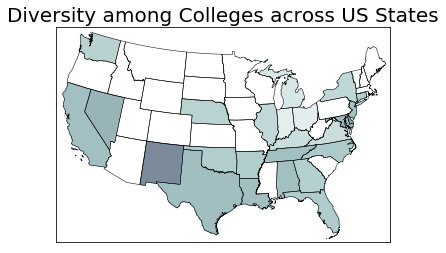

In [18]:
# reference: https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py

# creating a map of US states with diversity percentages

# lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# draw state boundaries
shp_info = m.readshapefile('./map_files/st99_d00','states',drawbounds=True)

# choose a color for each state based on population density
colors={}
statenames=[]
cmap = plt.cm.bone # use 'bone' colormap
vmin = 0; vmax = 5 # set range.
for shapedict in m.states_info:
    statename = shapedict['NAME']
    # skip DC and Puerto Rico
    if statename not in ['District of Columbia','Puerto Rico']:
        pop = div_dict[statename]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # population), take sqrt root to spread out colors more
        colors[statename] = cmap(1.-np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
# cycle through state names, color each one
ax = plt.gca() # get current axes instance

# setting the image size
plt.rcParams["figure.figsize"] = [35,10]

for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['District of Columbia','Puerto Rico']:
        color = rgb2hex(colors[statenames[nshape]]) 
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)
plt.title('Diversity among Colleges across US States', fontsize = 20)
plt.show()

We start to see the differences in the two groups of colleges (diverse v/s non-diverse) in various dimensions.  
The 1st dimension we examine is the average faculty salary.

In [19]:
# average faculty salary 
fac_sal = df.groupby(by=['DIVERSITY_FLAG'])['AVGFACSAL'].mean().reset_index()
fac_sal

,DIVERSITY_FLAG,AVGFACSAL
0,0,8413.081633
1,1,8205.609524


In [20]:
# performing 2 tailed independent sample t-test to check if the difference is significant
sal_non_div = df.loc[df['DIVERSITY_FLAG'] == 0]['AVGFACSAL']
sal_div = df.loc[df['DIVERSITY_FLAG'] == 1]['AVGFACSAL']

# t-test
t2, p2 = stats.ttest_ind(sal_non_div,sal_div)
print("t = " + str(t2))
print("p value = " + str(2*p2))

t = 0.767617269218
p value = 0.885993641405


Lower mean faculty salary in diversity-focused can allude to the fact that the cost of living can be a confounding variable that explains a lower cost of attendance, as well as lower family income!
However, we can see that the average faculty salary is not statistically different among the 2 groups.

Note: For an intuitive explanation of p-values, watch this video: https://www.youtube.com/watch?v=-FtlH4svqx4

The next dimension we look at is the admission rate.

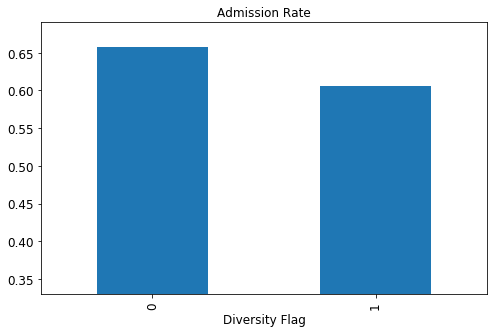

In [21]:
# admission rate 
adm_rate = df.groupby(by=['DIVERSITY_FLAG'])['ADM_RATE'].mean().reset_index()
# plotting admission rate
ax = adm_rate[['ADM_RATE']].plot(kind='bar', title ="Admission Rate", figsize=(8, 5), legend=False, fontsize=12)
ax.set_xlabel("Diversity Flag", fontsize=12)
ax.set_ylim(ymin=0.33)
plt.show()

In [22]:
# performing 2 tailed independent sample t-test to check if the difference is significant
adm_non_div = df.loc[df['DIVERSITY_FLAG'] == 0]['ADM_RATE']
adm_div = df.loc[df['DIVERSITY_FLAG'] == 1]['ADM_RATE']

# t-test
t2, p2 = stats.ttest_ind(adm_non_div,adm_div)
print("t = " + str(t2))
print("p value = " + str(2*p2))

t = 2.37300869024
p value = 0.0358747357962


As we can see, the difference is statistically significant. Hence, we can safely assume that it is harder to get into the schools that focus on diversity.

The next dimension we look at is the completion rate.  
C150_4 (Completion rate for first-time, full-time students at four-year institutions (150% of expected time to completion))

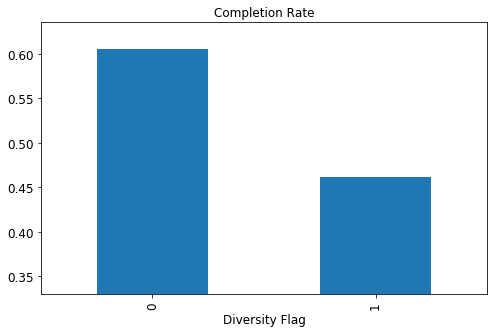

In [23]:
# completion rate
cmpl_rate = df.groupby(by=['DIVERSITY_FLAG'])['C150_4'].mean().reset_index()
# plotting completion rate
ax = cmpl_rate[['C150_4']].plot(kind='bar', title ="Completion Rate", figsize=(8, 5), legend=False, fontsize=12)
ax.set_xlabel("Diversity Flag", fontsize=12)
ax.set_ylim(ymin=0.33)
plt.show()

In [24]:
# performing 2 tailed independent sample t-test to check if the difference is significant
cmpl_non_div = df.loc[df['DIVERSITY_FLAG'] == 0]['C150_4']
cmpl_div = df.loc[df['DIVERSITY_FLAG'] == 1]['C150_4']

# t-test
t2, p2 = stats.ttest_ind(cmpl_non_div,cmpl_div)
print("t = " + str(t2))
print("p value = " + str(2*p2))

t = 7.89642336603
p value = 2.49314890946e-14


The difference is extremely significant, and we can conclude that the completion rates for colleges focused on diversity are much higher than their regular counterparts.
One of the possible explanations is that the overall harder life situations might prevent students from disadvantaged backgrounds to successfully complete their degrees in a timely manner. 

The next dimension we look at is the 5-year Repayment Rate: both for students who completed their graduation, and for students who didn't complete their graduation.

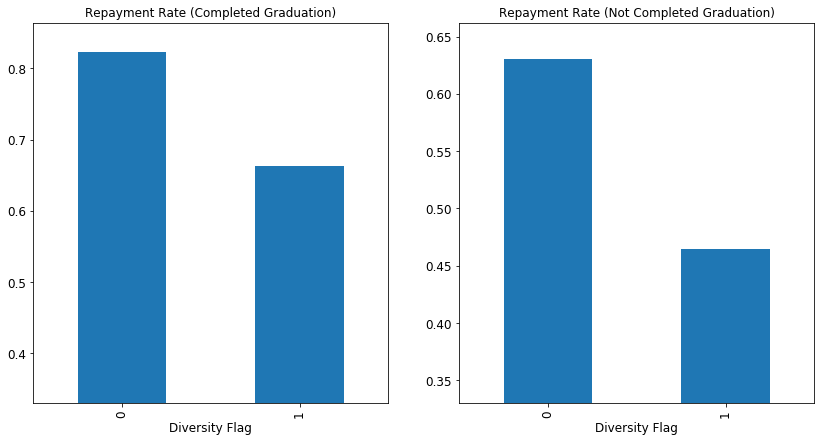

In [25]:
# 5 year repayment rates for completers and non-completers
df['COMPL_RPY_5YR_RT'] = df['COMPL_RPY_5YR_RT'].astype(float)
df['NONCOM_RPY_5YR_RT'] = df['NONCOM_RPY_5YR_RT'].astype(float)
rpymnt_cmplt = df.groupby(by=['DIVERSITY_FLAG'])['COMPL_RPY_5YR_RT'].mean().reset_index()
rpymnt_not_cmplt = df.groupby(by=['DIVERSITY_FLAG'])['NONCOM_RPY_5YR_RT'].mean().reset_index()

# defining figure
fig, axes = plt.subplots(nrows=1, ncols=2)

# plotting repayment rates (completed graduation)
rpymnt_cmplt[['COMPL_RPY_5YR_RT']].plot(kind='bar', title ="Repayment Rate (Completed Graduation)", 
                                        figsize=(14, 7), legend=False, fontsize=12, ax = axes[0])
axes[0].set_xlabel("Diversity Flag", fontsize=12)
axes[0].set_ylim(ymin=0.33)

# plotting repayment rates (not completed graduation)
rpymnt_not_cmplt[['NONCOM_RPY_5YR_RT']].plot(kind='bar', title ="Repayment Rate (Not Completed Graduation)", 
                                             figsize=(14, 7), legend=False, fontsize=12, ax = axes[1])
axes[1].set_xlabel("Diversity Flag", fontsize=12)
axes[1].set_ylim(ymin=0.33)

# displaying the plots
plt.show()

Plotting the repayment rates for both, we can clearly observe that the repayment rates are significantly lower for diversity-focused colleges. While repayment rates for students who could not complete graduation can be expected to be lower for diversity-focused colleges, that it is lower for students who successfully completed is less intuitive. Further research needs to be taken up on this phenomenon to ascertain the reasons for this huge gap. 

The next dimension we look at it the Return on Investment.  
Return on Investment is highly dependent on the kind of courses pursued and to account for this we also plot the percent of degrees related to Science, Technology, Engineering, and Mathematics (STEM).  

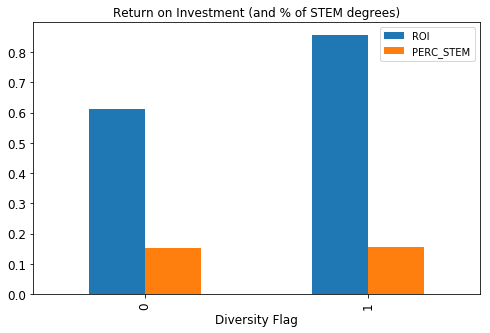

In [26]:
# return on investment
roi = df.groupby(by=['DIVERSITY_FLAG'])['ROI'].mean().reset_index()
# percent of STEM degrees offered
stem = df.groupby(by=['DIVERSITY_FLAG'])['PERC_STEM'].mean().reset_index()

# merging the above two dataframes
roi = pd.merge(stem, roi, on = 'DIVERSITY_FLAG')

# plotting Return on Investment (including STEM %s)
ax = roi[['ROI', 'PERC_STEM']].plot(kind='bar', title ="Return on Investment (and % of STEM degrees)", figsize=(8, 5), legend=True, fontsize=12)
ax.set_xlabel("Diversity Flag", fontsize=12)
ax.set_ylim(ymin=0.0)
plt.show()

As can be seen from the above graph, there is no discernible difference between the percentage of STEM degrees awarded in the two types of colleges. However, the Return of Investment is significantly higher for the colleges focused on diversity efforts. It seems to be a smarter financial decision to attend the colleges focused on diversity efforts (which might partly explain lower admission rates too).  

## Summary of Findings
* Public universities such as the University of California and the University of Texas systems seem to be driving diversity efforts in a good direction, and further research in their efforts can inform public policy initiatives. 
* It is more difficult than average to get an admission into diversity-focused colleges.
* The completion rate is lower in diversity-focused colleges, and special programs can be formulated to avoid student drop-outs due to financial (and other) constraints. 
* The repayment rate is significantly lower in diversity-focused colleges. Further research is required to understand the reasons for the same and frame effective solutions. 
* It might also make more sense financially to attend a diversity-focused college, all else being equal. 

## Limitations of the Study
* The College scorecard dataset is only limited to the students who have received a federal financial aid, which potentially biases the results.
* Analysis performed only on colleges which had complete data for the variables under consideration (644/7175 colleges considered for the analysis).
* The earnings data is recorded for 10 years after entry into the program, which can skew figures for programs which have longer time periods of study (such as medicine).  
* The cost of living and tuition will not be the "same" across all colleges due to differences in the cost of living across states. 

## Conclusion
The study was a small exercise in demonstrating the power of open data in framing questions that are personally relevant. The notebook is constructed keeping in mind the reproducibility aspect, and the reader is encouraged to frame their own research questions.  
College is an essential part of achieving the American Dream, and institutions that are trying to equalize opportunities by focusing on diversity deserve appreciation and support. We can see that the colleges focused on diversity are different from the regular colleges on a number of different parameters. The findings can also hopefully inspire further research to dive deeper into some of the reasons for the variances. 

## References:
[1] https://www.brookings.edu/opinions/understanding-the-college-scorecard/#cancel   
[2] https://www.treasury.gov/connect/blog/Pages/A-Comparison-between-the-College-Scorecard-and-Mobility-Report-Cards.aspx   
[3] https://www.economist.com/graphic-detail/2015/10/29/our-first-ever-college-rankings   
[4] https://www.brookings.edu/research/using-earnings-data-to-rank-colleges-a-value-added-approach-updated-with-college-scorecard-data/   

Other resources:  
https://learn.scientificprogramming.io/python-k-means-data-clustering-and-finding-of-the-best-k-485f66297c06  
https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py    